In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

stud_df = pd.ExcelFile('datastud.xlsx')
table = stud_df.parse('Результаты')
table

,Дисциплина,Группа,Студент (Код),Семестр,ИД семестра,Зачет,Оценка по предмету,Пересдачи,Средний балл,Результат сессии,ЕГЭ,Оценка студента (опрос)
0,43,1,1,1,0,1.0,NaN,0,NaN,3,NaN,NaN
1,43,1,2,1,0,1.0,NaN,0,NaN,1,197.0,NaN
2,43,1,3,1,0,1.0,NaN,0,NaN,3,240.0,NaN
3,43,1,4,1,0,1.0,NaN,0,NaN,1,203.0,NaN
4,43,1,5,1,0,1.0,NaN,0,NaN,3,198.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16450,123,9,272,8,11,NaN,5.0,0,4.75,3,259.0,NaN
16451,123,9,274,8,11,NaN,4.0,0,4.00,1,152.0,NaN
16452,123,9,276,8,11,NaN,5.0,0,5.00,4,242.0,NaN
16453,123,9,277,8,11,NaN,5.0,0,5.00,4,260.0,NaN


In [2]:
clean_df = table.drop(columns=['Зачет', 'ИД семестра'])
for x in range(1,8):
    semestr = clean_df.loc[clean_df['Семестр'] == x]
    group_sem = semestr.iloc[:, [1,3,4,5,6,7,8,9]]
    mean_gr_sem = group_sem.groupby(by=['Группа']).mean()
    semestr_stats = mean_gr_sem.reset_index().set_index('Семестр')
    if x == 1:
        empty_df = semestr_stats.iloc[0:0]
        global_df = pd.concat([semestr_stats, empty_df])
    else:
        global_df = pd.concat([semestr_stats, global_df])

In [3]:
global_df

,Группа,Оценка по предмету,Пересдачи,Средний балл,Результат сессии,ЕГЭ,Оценка студента (опрос)
Семестр,,,,,,,
7.0,1,4.196078,0.512605,4.195882,2.411765,207.625000,4.498282
7.0,2,4.518519,0.250000,4.509444,2.611111,235.076923,4.619048
7.0,3,4.619048,0.163043,4.555000,2.695652,229.263158,4.333333
7.0,4,4.781250,0.385714,4.583333,1.600000,187.142857,5.000000
7.0,5,4.722222,0.062500,4.722917,3.375000,244.857143,4.916667
...,...,...,...,...,...,...,...
1.0,5,4.287500,0.205955,4.301269,-1.642680,230.943396,4.560000
1.0,6,4.023529,0.386635,4.069335,-2.174224,223.509804,4.694444
1.0,7,4.052632,0.571918,4.054604,0.075342,190.922780,4.642857


In [4]:
copy_df= global_df.copy()
copy_df.reset_index(inplace=True)
heat_df = copy_df.pivot(index="Семестр", columns="Группа", values="Оценка по предмету")
heat_df

Группа,1,2,3,4,5,6,7,8,9
Семестр,,,,,,,,,
1.0,NaN,NaN,NaN,3.865385,4.287500,4.023529,4.052632,4.177083,4.347368
2.0,NaN,NaN,NaN,4.139785,4.510989,4.220430,4.141667,4.442786,4.486364
3.0,3.790123,4.464000,4.438017,3.946429,4.504762,4.161616,3.774194,4.221239,4.322835
4.0,3.919192,4.563559,4.597403,4.444444,4.616114,4.333333,4.000000,4.515957,4.628019
5.0,4.017241,4.416667,4.533333,4.470588,4.802469,4.126984,4.484848,4.409836,4.794872
6.0,4.400000,4.031579,4.250000,4.472222,4.576159,3.728814,4.122449,4.017857,4.467949
7.0,4.196078,4.518519,4.619048,4.781250,4.722222,4.370370,3.886792,4.230769,4.653846


Text(0.5, 1.0, 'Оценка по предмету')

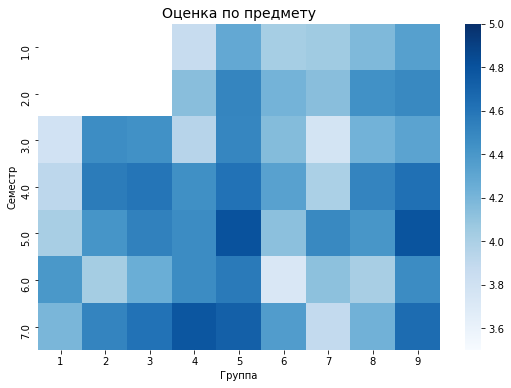

In [5]:
plt.figure(figsize=(9,6))
sns.heatmap(heat_df, vmin=3.5, vmax=5, cmap='Blues');
plt.title('Оценка по предмету', fontsize = 14)

In [6]:
heat_df2 = copy_df.reset_index().pivot(index="Семестр", columns="Группа", values="Средний балл")
heat_df2

Группа,1,2,3,4,5,6,7,8,9
Семестр,,,,,,,,,
1.0,NaN,NaN,NaN,3.922656,4.301269,4.069335,4.054604,4.174257,4.337407
2.0,NaN,NaN,NaN,4.173477,4.516720,4.196797,4.120072,4.405226,4.502036
3.0,3.787500,4.388500,4.371667,4.010791,4.509446,4.156029,3.741739,4.177861,4.315941
4.0,3.948732,4.558219,4.573684,4.408636,4.601114,4.280031,3.980000,4.502167,4.638592
5.0,3.920102,4.325196,4.552658,4.365732,4.832593,4.099563,4.479933,4.420476,4.787308
6.0,4.299269,4.040000,4.267500,4.322727,4.572587,3.669491,4.150690,4.021277,4.467692
7.0,4.195882,4.509444,4.555000,4.583333,4.722917,4.356757,3.888571,4.212222,4.653846


Text(0.5, 1.0, 'Средний балл')

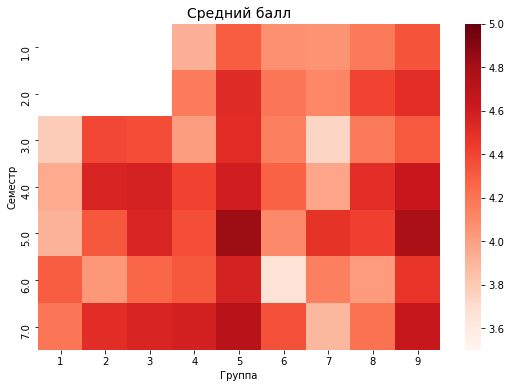

In [7]:
plt.figure(figsize=(9,6))
sns.heatmap(heat_df2, vmin=3.5, vmax=5, cmap='Reds');
plt.title('Средний балл', fontsize = 14)

In [8]:
heat_df3 = copy_df.reset_index().pivot(index="Семестр", columns="Группа", values="Пересдачи")
heat_df3

Группа,1,2,3,4,5,6,7,8,9
Семестр,,,,,,,,,
1.0,0.000000,0.000000,0.000000,0.562044,0.205955,0.386635,0.571918,0.403974,0.217687
2.0,0.000000,0.000000,0.000000,0.500000,0.343220,0.471058,0.320000,0.286252,0.206320
3.0,0.886567,0.200489,0.157623,0.396135,0.500000,0.926829,0.671296,0.384259,0.158371
4.0,0.938389,0.370588,0.332326,0.302703,0.493036,0.824074,0.525253,0.523416,0.427793
5.0,2.026786,0.637255,0.510549,0.375796,0.152263,0.883721,0.852349,0.919192,0.148148
6.0,0.771186,0.542857,0.566667,0.488506,0.208178,1.481481,0.711538,0.728111,0.271698
7.0,0.512605,0.250000,0.163043,0.385714,0.062500,0.648649,0.755102,0.583333,0.038462


Text(0.5, 1.0, 'Пересдачи')

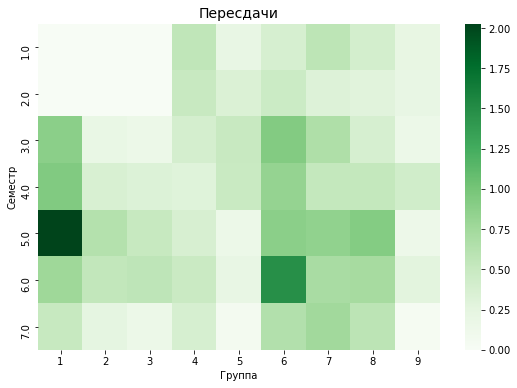

In [9]:
plt.figure(figsize=(9,6))
sns.heatmap(heat_df3, cmap='Greens');
plt.title('Пересдачи', fontsize = 14)

In [10]:
heat_df4 = copy_df.reset_index().pivot(index="Семестр", columns="Группа", values="Результат сессии")
heat_df4

Группа,1,2,3,4,5,6,7,8,9
Семестр,,,,,,,,,
1.0,1.277778,2.365385,2.244444,-1.686131,-1.642680,-2.174224,0.075342,0.536424,2.047619
2.0,1.333333,0.536082,0.755556,-1.409375,1.148305,-0.465070,0.093333,-0.079096,0.907063
3.0,-1.173134,0.713936,1.661499,-0.898551,1.777174,-0.224932,0.125000,-0.314815,1.113122
4.0,0.061611,1.755882,2.193353,0.086486,0.083565,-2.231481,-0.681818,0.170799,1.784741
5.0,0.196429,1.254902,2.801688,1.305732,2.666667,-0.381395,2.040268,1.277778,3.074074
6.0,0.038136,0.523810,0.750000,-1.396552,1.676580,-0.569444,1.929487,-0.027650,2.075472
7.0,2.411765,2.611111,2.695652,1.600000,3.375000,2.081081,1.428571,2.055556,3.269231


Text(0.5, 1.0, 'Результаты сессии')

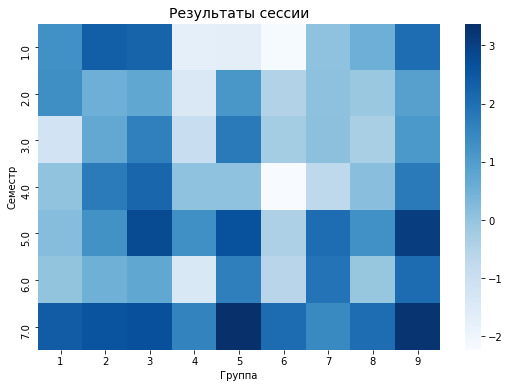

In [11]:
plt.figure(figsize=(9,6))
sns.heatmap(heat_df4, cmap='Blues');
plt.title('Результаты сессии', fontsize = 14)

In [12]:
t = table.drop(columns=['ИД семестра'])
t

,Дисциплина,Группа,Студент (Код),Семестр,Зачет,Оценка по предмету,Пересдачи,Средний балл,Результат сессии,ЕГЭ,Оценка студента (опрос)
0,43,1,1,1,1.0,NaN,0,NaN,3,NaN,NaN
1,43,1,2,1,1.0,NaN,0,NaN,1,197.0,NaN
2,43,1,3,1,1.0,NaN,0,NaN,3,240.0,NaN
3,43,1,4,1,1.0,NaN,0,NaN,1,203.0,NaN
4,43,1,5,1,1.0,NaN,0,NaN,3,198.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16450,123,9,272,8,NaN,5.0,0,4.75,3,259.0,NaN
16451,123,9,274,8,NaN,4.0,0,4.00,1,152.0,NaN
16452,123,9,276,8,NaN,5.0,0,5.00,4,242.0,NaN
16453,123,9,277,8,NaN,5.0,0,5.00,4,260.0,NaN
